# Kronecker coefficient computer.

#### Authors: Stefan Trandafir \& Marni Mishna.

### Motivation.

This file is a companion to the paper *Estimating and computing Kronecker coefficients* (Mishna, Trandafir, 2022).
Mainly, it can be used to compute Kronecker coefficients $g_{\lambda, \mu, \nu}$ for $\ell(\lambda) \leq 8, \ell(\mu) \leq 2, \ell(\nu) \leq 4$ via the process described in Section 3 ("Explicit computation of Kronecker coefficients"). 

In addition we give functions to compute the vanishing conditions given Theorem 4.4 of Section 4 ("Vanishing conditions"), as well as the upper bounds given in Corollaries 6.6 and 6.8 of Section 6 ("Upper bounds for Kronecker coefficients").

The notation in this document is generally consistent with the paper, so that the paper can be used to clarify
most misunderstandings.

### Technical details.

In this file, there are three different tools for computing Kronecker coefficients $g_{\mu, \nu, \lambda}$: K22, K23, K24. 
- K22 works for the case when $\ell(\mu), \ell(\nu) \leq 2, \ell(\lambda) \leq 4$.  
- K23 works for the case when $\ell(\mu) \leq 2, \ell(\nu) \leq 3, \ell(\lambda) \leq 6$.
- K24 works for the case when $\ell(\mu) \leq 2, \ell(\nu) \leq 4, \ell(\lambda) \leq 8$.

It takes a while to load with K24 (about 1 minute) so if you are not interested in using that, then you can comment it out. Note that you can use K24 to compute any of the examples, but it is much much slower.

**The class Kronecker computer**
These tools are objects of a class we call "KroneckerComputer". They have are defined by 4 attributes:
- m   (the upper bound on the length of mu)
- n   (the upper bound on the length of nu)
- alternant_terms: a list of "AlternantTerm"s (for more on this see the heading "The class AlternantTerm" below)
- vector_partition_function: the vector partition function (for more on this see the appropriate heading)


If you are only interested in computing the Kronecker coefficient, then you need only use the method ".kronecker_coefficient()". 

Alternatively, if you want to see the signed sum of vector partition functions from Thereom 1.1 of *Estimating and computing Kronecker coefficients* (Mishna, Trandafir, 2022) [previously described in *Vector partition functions and Kronecker coefficients* (Mishna, Rosas, Sundaram, 2021)], then you should use the method ".kronecker_coefficient_table()" which outputs three things: the Kronecker coefficient, the number of non-zero alternant terms, and a table illustrating the vector partition function input & corresponding vector partition function evaluation for each alternant term.

There are a number of other methods associated to the KroneckerComputer class. Feel free to check them out by picking one of the KroneckerComputers (say K22) and typing "K22." (the dot is important!) followed by the TAB key. Most of the methods are discussed at some point in this document.

**AlternantTerm**
The alternant term class is defined by 3 attributes:
- m  (the upper bound on the length of mu)
- n  (the upper bound on the length of nu)
- perm  (the corresponding permutation).

The AlternantTerm class also has a number of attributes (most of which work in the background to achieve things for the KroneckerComputer class). If you are interested in seeing these you can choose an AlternantTerm from the alternant_terms list associated to any KroneckerComputer by doing for example ("at = K22.alternant_terms[0]"), and then typing "at." followed by the TAB key (as before).

**Vector partition function**
The vector partition attribute is a "PiecewiseQuasipolynomial", which is defined by 3 attributes:
- chambers (a list of Cones - see https://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/cone.html
for more information)
- quasipolynomials (a list of quasipolynomials represented by step polynomials - see https://barvinok.sourceforge.io/ for more information)
- variables (a list of variables)


**All 2,4,8 computations are commented out in case you want to run everything and not get slowed down.In order to uncomment them highlight the text in the cell and press "CTRL" + "/". NOTE: you have to begin by uncommenting K24 two cells down.**

### Enjoy!

-----------------------------------------
## Loading the necessary files.

In [1]:
# A couple files we need.

load('KroneckerComputer.sage')
load('PiecewiseQuasipolynomial.sage')

In [2]:
%%time

# load everything (this takes roughly 1-2 minutes if you load K24).
K22 = load('K22.sobj')
K23 = load('K23.sobj')
# K24 = load('K24.sobj')

# note we don't need alternant terms (except for the atomic one) or vector partition function 
# to compute the bounds or the vanishign conditions.
K33 = KroneckerComputer(3, 3, [AlternantTerm(3, 3, Permutation([1..9]))], None)

CPU times: user 29.4 ms, sys: 8 ms, total: 37.5 ms
Wall time: 57.2 ms


In [3]:
pq23 = K23.vector_partition_function
for i, chamber in enumerate(pq23.chambers):
    print(i)
    print(chamber.rays())
    print('\n')

0
N(1, 3, 4),
N(0, 1, 2),
N(0, 1, 1)
in 3-d lattice N


1
N(1, 2, 3),
N(1, 3, 4),
N(0, 1, 2)
in 3-d lattice N


2
N(1, 2, 4),
N(1, 2, 3),
N(0, 1, 2)
in 3-d lattice N


3
N(1, 2, 4),
N(1, 2, 5),
N(0, 1, 2)
in 3-d lattice N


4
N(1, 1, 2),
N(1, 2, 3),
N(1, 2, 4)
in 3-d lattice N


5
N(1, 1, 2),
N(1, 1, 3),
N(1, 2, 5),
N(1, 2, 4)
in 3-d lattice N


6
N(1, 1, 2),
N(1, 0, 1),
N(1, 1, 3)
in 3-d lattice N


7
N(1, 3, 3),
N(0, 1, 0),
N(0, 1, 1)
in 3-d lattice N


8
N(1, 2, 2),
N(0, 1, 0),
N(1, 3, 3)
in 3-d lattice N


9
N(1, 1, 1),
N(0, 1, 0),
N(1, 2, 2)
in 3-d lattice N


10
N(2, 5, 6),
N(1, 3, 3),
N(0, 1, 1),
N(1, 3, 4)
in 3-d lattice N


11
N(1, 2, 3),
N(2, 5, 6),
N(1, 3, 4)
in 3-d lattice N


12
N(1, 2, 2),
N(2, 5, 6),
N(1, 3, 3)
in 3-d lattice N


13
N(1, 2, 2),
N(1, 2, 3),
N(2, 5, 6)
in 3-d lattice N


14
N(1, 1, 1),
N(3, 4, 5),
N(1, 2, 2)
in 3-d lattice N


15
N(1, 1, 1),
N(2, 2, 3),
N(3, 4, 5)
in 3-d lattice N


16
N(2, 3, 4),
N(1, 2, 2),
N(1, 2, 3)
in 3-d lattice N


17
N(3, 4, 6),
N(

In [4]:
pq23.quasipolynomials[0]

-1/640*b1^8 + 1/5040*b1^7*(15*b2 + 4*b3 - 86) - 1/1920*(8*b2*(b3 - 8) - 2*b3^2 - 20*b3 + 93)*b1^6 - 1/2880*(12*b2^3 - 12*b2^2*(2*b3 - 1) - 2*b3^3 + 12*(b3^2 + 12*b3 - 22)*b2 - 36*b3^2 - 140*b3 - 85)*b1^5 - 1/1920*(120*b2^3 - 120*b2^2*(2*b3 - 1) - 20*b3^3 + 40*(3*b3^2 + 8*b3 + 8)*b2 - 80*b3^2 - 200*b3 - 323)*b1^4 - 1/1440*(510*b2^3 - 510*b2^2*(2*b3 - 1) - 85*b3^3 + 30*(17*b3^2 - 6*b3 + 49)*b2 + 45*b3^2 - 256*b3 + 439)*b1^3 - 1/960*(900*b2^3 - 900*b2^2*(2*b3 - 1) - 150*b3^3 + 4*(225*b3^2 - 401*b3 + 208)*b2 + 401*b3^2 - 450*b3 + 15*frac(1/2*b1 + 1/2*b3) + 15*frac(1/2*b3) + 526)*b1^2 - 1/2*b2^3 + 1/2*b2^2*(2*b3 - 1) + 1/12*b3^3 - 1/10080*(11508*b2^3 - 11508*b2^2*(2*b3 - 1) - 1918*b3^3 + 12*(959*b3^2 - 2457*b3 - 778)*b2 + 7371*b3^2 - 7790*b3 + 945*frac(1/2*b1 + 1/2*b3) + 945*frac(1/2*b3) - 8460)*b1 - 1/2*(b3^2 - 3*b3 - 2)*b2 - 3/8*b3^2 + 5/12*b3 - 1/8*frac(1/2*b1 + 1/2*b3) - 1/8*frac(1/2*b3) + 1

## A few 2,3,6 examples.

Here we check a few examples where 
$$\ell(\lambda) \leq 6, \ell(\mu) \leq 2, \ell(\nu) \leq 3$$ 
with both the K23 and K24 solvers to make sure things are consistent. 

In [5]:
%%time 
# Here we check a 2,3,6 test case to make sure we get the same answer with the 24 and 23 computer.

LAMBDA = (34, 27, 20, 12, 4, 3)
MU = (70, 30)
NU = (43, 39, 18)

# using the method "kronecker_coefficient_table" we can see the corresponding 
# vector partition evaluation for each alternant term 

kc, nt, t = K23.kronecker_coefficient_table(LAMBDA, MU, NU)
print(f'The Kronecker coefficient in this case is {kc}.')
print(f'There are {nt} alternant terms which make a non-zero contribution to the Kronecker coefficient.')
print(t)

The Kronecker coefficient in this case is 2566.
There are 23 alternant terms which make a non-zero contribution to the Kronecker coefficient.
  Permutation          b value        Signed evaluation
+--------------------+--------------+-------------------+
  [1, 2, 3, 4, 5, 6]   (18, 14, 17)   94140
  [1, 3, 2, 4, 5, 6]   (10, 14, 17)   -86445
  [1, 2, 3, 4, 6, 5]   (18, 14, 15)   -49411
  [1, 3, 2, 4, 6, 5]   (10, 14, 15)   47516
  [1, 2, 3, 5, 4, 6]   (18, 5, 17)    -4623
  [1, 3, 2, 5, 4, 6]   (10, 5, 17)    3498
  [2, 1, 3, 4, 5, 6]   (18, 6, 9)     -2315
  [1, 2, 4, 3, 5, 6]   (18, 14, 8)    -1989
  [2, 1, 3, 4, 6, 5]   (18, 6, 7)     1024
  [1, 2, 3, 6, 4, 5]   (18, 3, 15)    848
  [2, 3, 1, 4, 5, 6]   (2, 6, 9)      728
  [1, 3, 2, 6, 4, 5]   (10, 3, 15)    -675
  [1, 2, 4, 3, 6, 5]   (18, 14, 6)    571
  [1, 2, 3, 5, 6, 4]   (18, 5, 6)     521
  [1, 3, 2, 5, 6, 4]   (10, 5, 6)     -521
  [2, 3, 1, 4, 6, 5]   (2, 6, 7)      -496
  [1, 4, 2, 3, 5, 6]   (1, 14, 8)     369
  [1, 2, 

In [6]:
%time
LAMBDA = [87, 87, 24, 0, 0, 0]
MU = [99, 99]
NU = [66, 66, 66]

K23.kronecker_coefficient(LAMBDA, MU, NU)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 µs


1

In [7]:
%%time
# This example is significant since there are a lot of alternant terms which make a non-zero
# contribution to the Kronecker coefficient (namely 288). However, there is a lot of cancellation here...

LAMBDA = [87, 87, 24, 0, 0, 0]
MU = [99, 99]
NU = [66, 66, 66]

kc, nt, t = K23.kronecker_coefficient_table(LAMBDA, MU, NU)
print(f'The Kronecker coefficient in this case is {kc}.')
print(f'There are {nt} alternant terms which make a non-zero contribution to the Kronecker coefficient.')
print(t)

The Kronecker coefficient in this case is 1.
There are 288 alternant terms which make a non-zero contribution to the Kronecker coefficient.
  Permutation          b value           Signed evaluation
+--------------------+-----------------+-------------------+
  [1, 2, 3, 4, 5, 6]   (108, 120, 186)   987973200133
  [1, 2, 3, 4, 6, 5]   (108, 120, 185)   -970260839971
  [1, 2, 3, 5, 4, 6]   (108, 119, 186)   -956520940355
  [2, 1, 3, 4, 5, 6]   (108, 119, 185)   -939836423135
  [1, 2, 3, 5, 6, 4]   (108, 119, 184)   922960673083
  [2, 1, 3, 4, 6, 5]   (108, 119, 184)   922960673083
  [1, 2, 3, 6, 4, 5]   (108, 118, 185)   909480864634
  [2, 1, 3, 5, 4, 6]   (108, 118, 185)   909480864634
  [1, 2, 3, 6, 5, 4]   (108, 118, 184)   -893593031820
  [2, 1, 3, 5, 6, 4]   (108, 118, 183)   -877523184642
  [2, 1, 3, 6, 4, 5]   (108, 117, 184)   -864309836688
  [2, 1, 3, 6, 5, 4]   (108, 117, 183)   849189005991
  [1, 2, 4, 3, 5, 6]   (108, 120, 161)   -526294347443
  [1, 2, 4, 3, 6, 5]   (108, 12

## Some 2,4,8 examples.
The examples below cannot be done with the 2,3,6 computer (nor with Baldoni-Vergne-Walter). Thus, we have only actually verified one of them (the Balantine-Orellana one). More known examples would be welcome here :)

In [8]:
# %%time
# # This takes a while!!! 

# LAMBDA = [87, 87, 24, 0, 0, 0, 0, 0]
# MU = [99, 99]
# NU = [66, 66, 66, 0]

# kc, nt, t = K24.kronecker_coefficient_table(LAMBDA, MU, NU)
# print(f'The Kronecker coefficient in this case is {kc}.')
# print(f'There are {nt} alternant terms which make a non-zero contribution to the Kronecker coefficient.')
# print(t)

In [9]:
# %%time
# # This yields 0. (and takes 1hr 16mins 16seconds to compute that).

# LAMBDA = [60, 60, 60, 60, 60, 60, 40, 0]
# MU = [200, 200]
# NU = [100, 100, 100, 100]

# kc, nt, t = K24.kronecker_coefficient_table(LAMBDA, MU, NU)
# print(f'The Kronecker coefficient in this case is {kc}.')
# print(f'There are {nt} alternant terms which make a non-zero contribution to the Kronecker coefficient.')
# # print(t)

In [10]:
# %%time
# # We got 391 here. (and takes 52min 11s to compute that)

# LAMBDA = [57, 57, 57, 33, 33, 33, 10, 0]
# MU = [140, 140]
# NU = [70, 70, 70, 70]

# K24.kronecker_coefficient_table(LAMBDA, MU, NU)

In [11]:
# %%time
# # An example from Ballantine, Orellana (immediately preceding Corrolary 3.3), answer should be 4. 
# # and we get 4. (in this case it takes 1-2 minutes to compute)

# LAMBDA = [6, 4, 4, 1, 0, 0, 0, 0]
# MU = [12, 3]
# NU = [5, 4, 3, 3]

# kc, nt, t = K24.kronecker_coefficient_table(LAMBDA, MU, NU)
# print(f'The Kronecker coefficient in this case is {kc}.')
# print(f'There are {nt} alternant terms which make a non-zero contribution to the Kronecker coefficient.')
# print(t)

## Extra things.

### Manipulating the vector partition functions.

We can also manipulate the vector partition functions.

In [12]:
p23 = K23.vector_partition_function

In [13]:
print(f'There are {len(p23.chambers)} chambers in the 2,3,6 case')
print(f'The first one is generated by the following rays:')
print(p23.chambers[0].rays())

There are 34 chambers in the 2,3,6 case
The first one is generated by the following rays:
N(1, 3, 4),
N(0, 1, 2),
N(0, 1, 1)
in 3-d lattice N


In [14]:
print('Here is the quasi-polynomial associated to the first chamber')
print(p23.quasipolynomials[0])

Here is the quasi-polynomial associated to the first chamber
-1/640*b1^8 + 1/5040*b1^7*(15*b2 + 4*b3 - 86) - 1/1920*(8*b2*(b3 - 8) - 2*b3^2 - 20*b3 + 93)*b1^6 - 1/2880*(12*b2^3 - 12*b2^2*(2*b3 - 1) - 2*b3^3 + 12*(b3^2 + 12*b3 - 22)*b2 - 36*b3^2 - 140*b3 - 85)*b1^5 - 1/1920*(120*b2^3 - 120*b2^2*(2*b3 - 1) - 20*b3^3 + 40*(3*b3^2 + 8*b3 + 8)*b2 - 80*b3^2 - 200*b3 - 323)*b1^4 - 1/1440*(510*b2^3 - 510*b2^2*(2*b3 - 1) - 85*b3^3 + 30*(17*b3^2 - 6*b3 + 49)*b2 + 45*b3^2 - 256*b3 + 439)*b1^3 - 1/960*(900*b2^3 - 900*b2^2*(2*b3 - 1) - 150*b3^3 + 4*(225*b3^2 - 401*b3 + 208)*b2 + 401*b3^2 - 450*b3 + 15*frac(1/2*b1 + 1/2*b3) + 15*frac(1/2*b3) + 526)*b1^2 - 1/2*b2^3 + 1/2*b2^2*(2*b3 - 1) + 1/12*b3^3 - 1/10080*(11508*b2^3 - 11508*b2^2*(2*b3 - 1) - 1918*b3^3 + 12*(959*b3^2 - 2457*b3 - 778)*b2 + 7371*b3^2 - 7790*b3 + 945*frac(1/2*b1 + 1/2*b3) + 945*frac(1/2*b3) - 8460)*b1 - 1/2*(b3^2 - 3*b3 - 2)*b2 - 3/8*b3^2 + 5/12*b3 - 1/8*frac(1/2*b1 + 1/2*b3) - 1/8*frac(1/2*b3) + 1


### Poset of alternant terms.

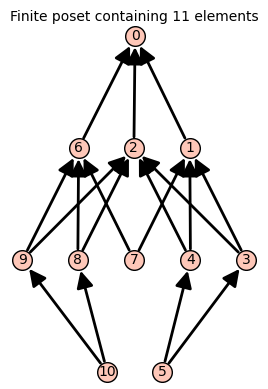

In [15]:
P = K22.poset(); P

In [16]:
for e in P:
    print(e, K22.alternant_terms[e].perm)

10 [3, 2, 1, 4]
9 [3, 1, 2, 4]
8 [2, 3, 1, 4]
7 [2, 1, 4, 3]
6 [2, 1, 3, 4]
5 [1, 4, 3, 2]
4 [1, 4, 2, 3]
3 [1, 3, 4, 2]
2 [1, 3, 2, 4]
1 [1, 2, 4, 3]
0 [1, 2, 3, 4]


In [17]:
R = P.subposet([0, 1, 2, 3, 6, 7, 9])

In [18]:
perm_elements = [tuple(K22.alternant_terms[i].perm) for i in R]
perm_cover_relations = [(tuple(K22.alternant_terms[i].perm), tuple(K22.alternant_terms[j].perm))
                        for i,j in R.cover_relations()]

In [19]:
Q = Poset((perm_elements, perm_cover_relations))

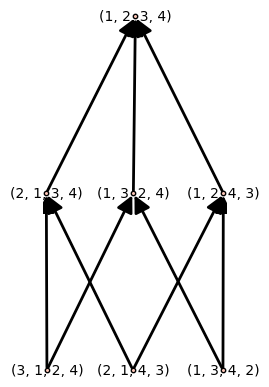

In [20]:
plot = Q.plot(element_size = 10, figsize=6); plot